In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import percentile
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/Acer Pc/Desktop/New folder (2)/Final_Data/1000Data/InsuranceClaim_data.csv')

In [3]:
df.head()

,Customer_ID,Claim_Invoice_No,Date,Age,Disease,Gender,BMI,Children,Smoker,Region,Charges
0,4.892870e+10,164002270931,4/17/2019,33,Urology,Male,33.4,3,1,2,38282.74950
1,4.892870e+10,164008879932,7/4/2019,33,Urology,Male,33.4,3,1,2,36898.73308
2,4.892870e+10,165008279935,6/7/2020,33,Urology,Male,33.4,3,1,2,48824.45000
3,4.892870e+10,165009279934,7/26/2020,33,Urology,Male,33.4,3,1,2,38415.47400
4,4.892870e+10,164332279933,1/5/2020,33,Urology,Male,33.4,3,1,2,37465.34375


In [4]:
rows_count, columns_count = df.shape
rows_count

1000

In [5]:
columns_count

11

In [6]:
df.shape

(1000, 11)

In [7]:
len(df.index)

1000

In [8]:
len(df.columns)

11

In [9]:
df.dtypes

Customer_ID         float64
Claim_Invoice_No      int64
Date                 object
Age                   int64
Disease              object
Gender               object
BMI                 float64
Children              int64
Smoker                int64
Region                int64
Charges             float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       1000 non-null   float64
 1   Claim_Invoice_No  1000 non-null   int64  
 2   Date              1000 non-null   object 
 3   Age               1000 non-null   int64  
 4   Disease           1000 non-null   object 
 5   Gender            1000 non-null   object 
 6   BMI               1000 non-null   float64
 7   Children          1000 non-null   int64  
 8   Smoker            1000 non-null   int64  
 9   Region            1000 non-null   int64  
 10  Charges           1000 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 86.1+ KB


In [11]:
df.isnull().sum()

Customer_ID         0
Claim_Invoice_No    0
Date                0
Age                 0
Disease             0
Gender              0
BMI                 0
Children            0
Smoker              0
Region              0
Charges             0
dtype: int64

In [12]:
df.isnull().values.any()

False

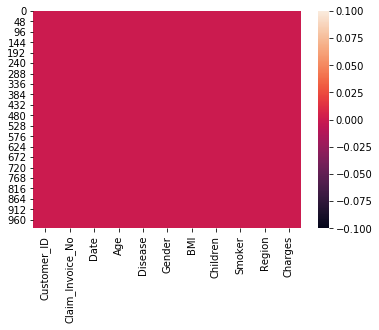

In [13]:
#Checking for null values
sns.heatmap(df.isnull())

In [14]:
df_transpose = df.describe().T

In [15]:
df_transpose

,count,mean,std,min,25%,50%,75%,max
Customer_ID,1000.0,3.749056e+12,1.573972e+13,2434.0000,1.324664e+06,3.666906e+07,1.940820e+10,9.921670e+13
Claim_Invoice_No,1000.0,1.522550e+11,4.153333e+11,4931.0000,3.690262e+06,1.628054e+08,1.618083e+11,1.697032e+12
Age,1000.0,4.056000e+01,1.372227e+01,18.0000,2.800000e+01,4.300000e+01,5.200000e+01,6.800000e+01
BMI,1000.0,3.340636e+01,1.085136e+01,19.3000,2.978375e+01,3.331000e+01,3.667000e+01,3.374000e+02
Children,1000.0,1.506000e+00,1.305246e+00,0.0000,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
Smoker,1000.0,7.020000e-01,4.576084e-01,0.0000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Region,1000.0,1.715000e+00,1.014300e+00,0.0000,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
Charges,1000.0,3.102767e+04,1.953089e+04,1163.4627,2.356827e+04,3.347199e+04,4.082436e+04,4.620030e+05


In [16]:
quartiles_age = percentile(df['Age'], [25,50,75]) # calculate the quartiles of age
quartiles_bmi = percentile(df['BMI'], [25,50,75]) # calculate the quartiles of bmi
quartiles_children = percentile(df['Children'], [25,50,75]) # calculate the quartiles of children
quartiles_charges = percentile(df['Charges'], [25,50,75]) # calculate the quartiles of charges
#calculate min/max
df_min_age, df_max_age = df['Age'].min(), df['Age'].max() # calculate the min/max of age
df_min_bmi, df_max_bmi = df['BMI'].min(), df['BMI'].max() # calculate the min/max of bmi
df_min_children, df_max_children = df['Children'].min(), df['Children'].max() # ca|lculate the min/max of children

df_min_charges, df_max_charges = df['Charges'].min(), df['Charges'].max() # calculate the min/max of charges
#display five point summary
print('5 point summary of Age:')
print('Min: %3.f' % df_min_age)
print('Q1: %3.f' % quartiles_age[0])
print('Median: %3.f' % quartiles_age[1])
print('Q3: %3.f' % quartiles_age[2])
print('Max: %3.f' % df_max_age)
print('\n')
print('5 point summary of BMI:')
print('Min: %3f' % df_min_bmi)
print('Q1: %3f' % quartiles_bmi[0])
print('Median: %3f' % quartiles_bmi[1])
print('Q3: %3f' % quartiles_bmi[2])
print('Max: %3f' % df_max_bmi)
print('\n')
print('5 point summary of Children:')
print('Min: %3.f' % df_min_children)
print('Q1: %3.f' % quartiles_children[0])
print('Median: %3.f' % quartiles_children[1])
print('Q3: %3.f' % quartiles_children[2])
print('Max: %3.f' % df_max_children)
print('\n')
print('5 point summary of Charges:')
print('Min: %3f' % df_min_charges)
print('Q1: %3f' % quartiles_charges[0])
print('Median: %3f' % quartiles_charges[1])
print('Q3: %3f' % quartiles_charges[2])
print('Max: %3f' % df_max_charges)

5 point summary of Age:
Min:  18
Q1:  28
Median:  43
Q3:  52
Max:  68


5 point summary of BMI:
Min: 19.300000
Q1: 29.783750
Median: 33.310000
Q3: 36.670000
Max: 337.400000


5 point summary of Children:
Min:   0
Q1:   0
Median:   1
Q3:   3
Max:   5


5 point summary of Charges:
Min: 1163.462700
Q1: 23568.272000
Median: 33471.985945
Q3: 40824.357875
Max: 462003.000000


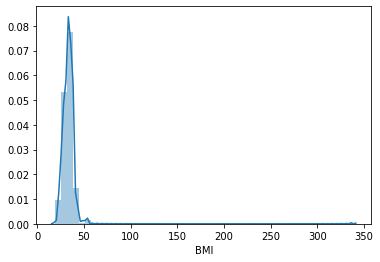

In [17]:
sns.distplot(df['BMI'])

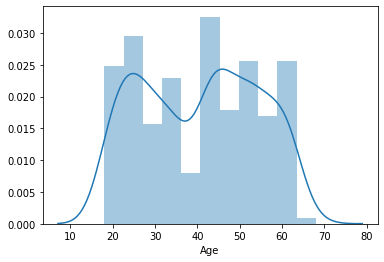

In [18]:
sns.distplot(df['Age']) # Distribution of age

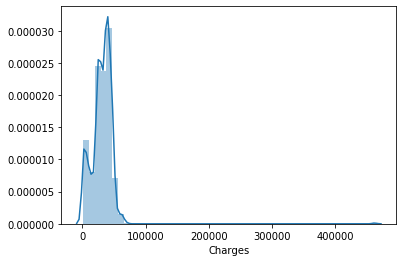

In [19]:
sns.distplot(df['Charges']) # Distribution of charges

In [20]:
df['BMI'].skew()

22.0680816901322

In [21]:
df['Age'].skew()

-0.015915294103196073

In [22]:
df['Charges'].skew()

10.568533765531322

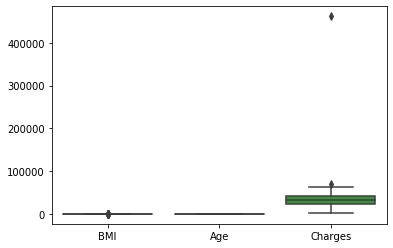

In [23]:
sns.boxplot(data = df[['BMI', 'Age', 'Charges']])

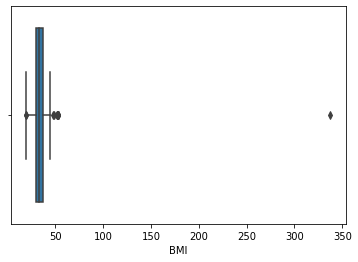

In [24]:
sns.boxplot(df['BMI'])

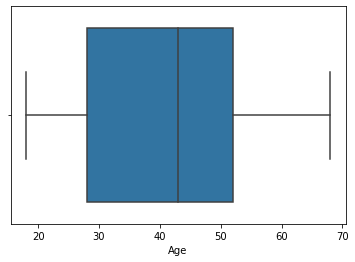

In [25]:
sns.boxplot(df['Age'])

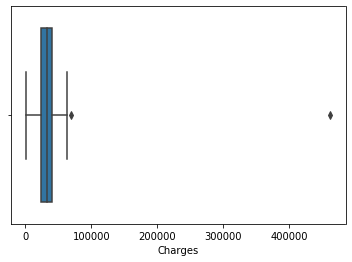

In [26]:
sns.boxplot(df['Charges'])

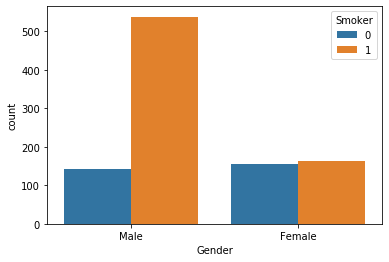

In [27]:
sns.countplot(x='Gender',hue='Smoker',data=df)

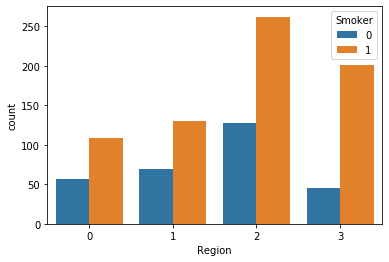

In [28]:
sns.countplot(x='Region',hue='Smoker',data=df)

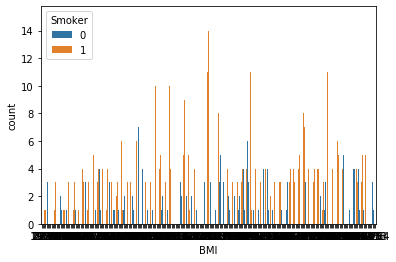

In [29]:
sns.countplot(x='BMI',hue='Smoker',data=df)

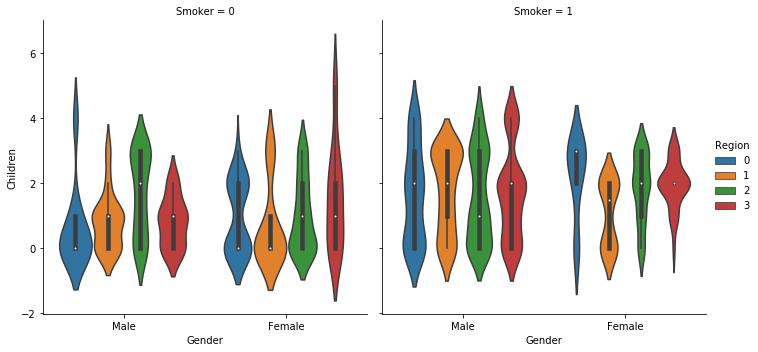

In [30]:
sns.catplot(x="Gender", y="Children", hue="Region", kind="violin", data=df, col="Smoker");

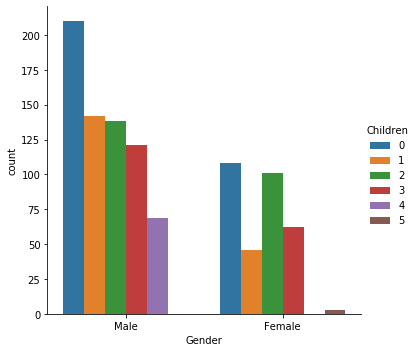

In [31]:
sns.catplot(x="Gender", hue="Children", kind= 'count', data=df)

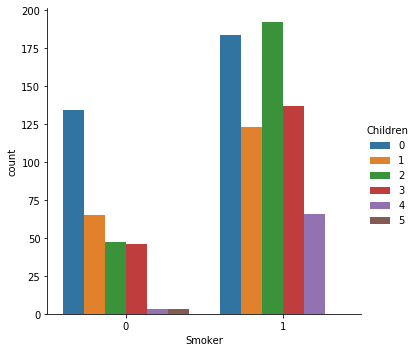

In [32]:
sns.catplot(x="Smoker", hue="Children", kind= 'count', data=df)

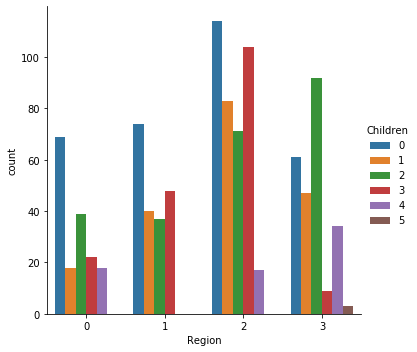

In [33]:
ax = sns.catplot(x="Region", hue="Children", kind= 'count', data=df)

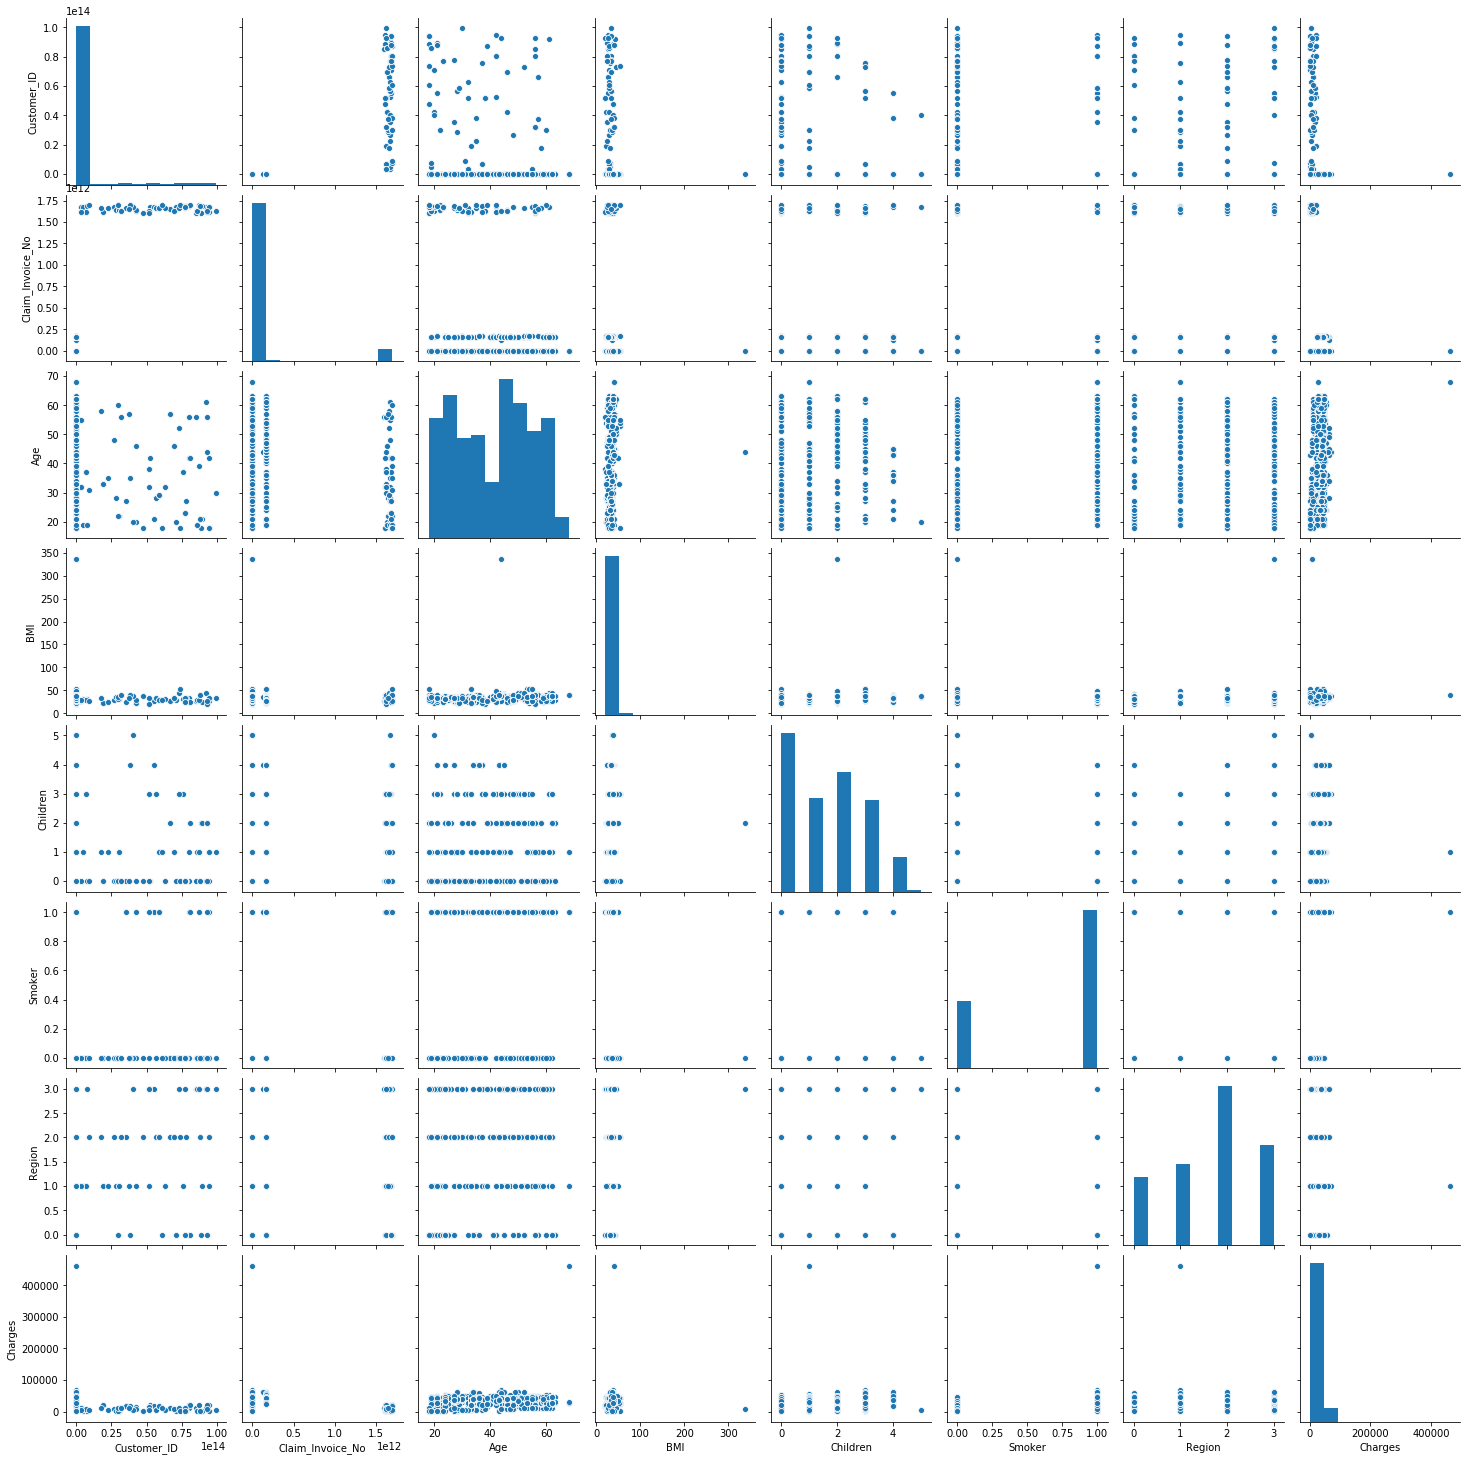

In [34]:
sns.pairplot(df)

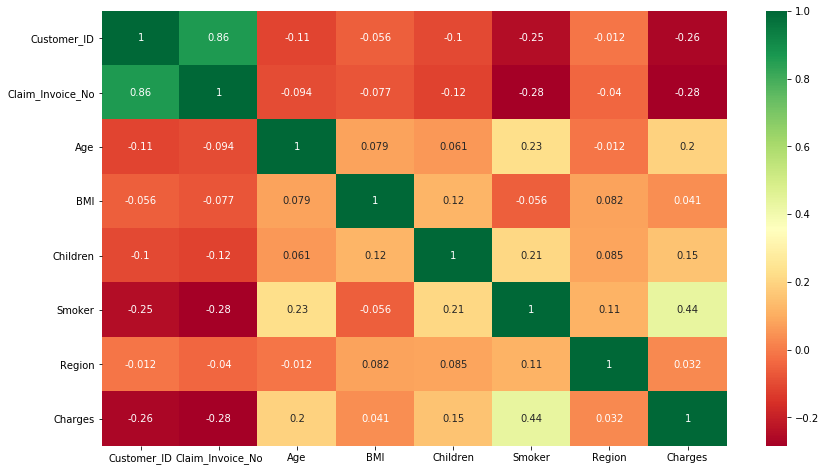

In [35]:
#Plotting correlation
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(14,8))
#To plot heatmap
import seaborn as sns
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")